### Solver
The solver used here to solve the ODE <br />
$$ u'(t)\ =\ -au$$
is a finite differences scheme called the generalized $\theta$-scheme, which gives the updated value of the mesh function as:<br />
$$ u^{n+1} = \frac{1\ -\ (1\ -\ \theta) a \Delta t}{1\ +\ \theta a \Delta t}\ u^{n} $$
for any $\theta \in [0,1]$, and $n = 0,1,\dots,N_{t}-1,\ \Delta t$ is the mesh points and time step, respectively.<br />
The analytical solution used to compare the numerical solutions to can be found as<br/>
$$u(t)\ =\ e^{-at}$$
where $a > 0$ gives an exponential decay solution, and $a < 0$ an exponential growth solution.

### Declaration of functions
Below, we find the functions used in the subsequent comparisons. No calculations are done here. 

In [15]:
import numpy as np


def theta_solver(I, a, T, dt, theta):
    """Solving u' = -a*u, u(0) = I, for t in (0,T] with steps of dt"""
    dt = float(dt)
    Nt = int(round(T/dt))
    T  = Nt*dt
    u  = np.zeros(Nt+1)
    t  = np.linspace(0, T, Nt+1)

    u[0]  = I                                       # Initial condition
    u[1:] = ((1 - (1-theta)*a*dt)/(1 + theta*dt*a))
    u[:]  = np.cumprod(u)

    return u, t

def u_exact(t, I, a):
    return I*np.exp(-a*t)

def amp_u(theta, adt):
    return (1 - (1-theta)*adt)/(1+ theta*adt)

def amp_exact(adt):
    return np.exp(-adt)

### Comparisons of different values of $\theta$
The following is a collection of two methods, the first solving the $\theta$-scheme for $\theta\ =\ [0,\ 0.5,\ 1]$. We take $a = -1$, so we are looking at a exponential growth case here. 

In [16]:
import matplotlib.pyplot as plt

def compare_num_exact(theta, I, a, T, dt):

    t_e = np.linspace(0,T,10001)  # Mesh for exact solution
    u_e = u_exact(t_e,I,a)       # Exact solution

    fig,ax = plt.subplots(1,1)
    fig.suptitle(r'Exp. growth, different $\theta$, dt = %g' %(dt))

    for th in theta:
        u, t = theta_solver(I=I, a=a, T=T, dt=dt, theta=th)

        ax.plot(t,u,'--o',label=[r'$\theta$ = %g' %(th)])
        
    
    ax.plot(t_e,u_e, 'k--',label=['exact'])
    ax.legend()
    ax.set_xlabel('t'); ax.set_ylabel('u')
    ax.grid()

    #plt.show()

The second method is looking at the amplification factor, which is the term before $u^{n}$ in the equation shown above. Here are the two amplifications factors, one for the numerical scheme, and one for the analytical solution<br />
$$A_{\text{num}} = \frac{1\ -\ (1\ -\ \theta) a \Delta t}{1\ +\ \theta a \Delta t}$$
$$A_{\text{exact}} = e^{-a\Delta t}$$
which should give us an indication on the ability for the scheme to represent the solution of the ODE.

In [17]:
def amp_compare(theta,adt):
    
    A_exact = amp_exact(adt)

    fig,ax = plt.subplots(1,1)
    fig.suptitle('Amplification factor')

    for th in theta:
        A_num   = amp_u(theta=th,adt=adt)

        ax.plot(adt,A_num, '--o',label=[r'$\theta$ = %g' %(th)])

    ax.plot(adt,A_exact,'k--o',label='exact')
    ax.legend()    
    ax.set_xlabel('t'); ax.set_ylabel('u')
    ax.grid()

This last part runs the two methods above using predeclared values as:<br />
Var | Value | Description
---|:---: | ---
$\theta$ | [0,\ 0.5,\ 1] |
I | 0.1 | Initial condition, ODE
a | -1  | 
T | 4.0 | Total time
dt | 0.1 | Time step

Lastly, two plots are shown comparing the scheme with the different values of $\theta$ to each other and also to the analytical solution. 

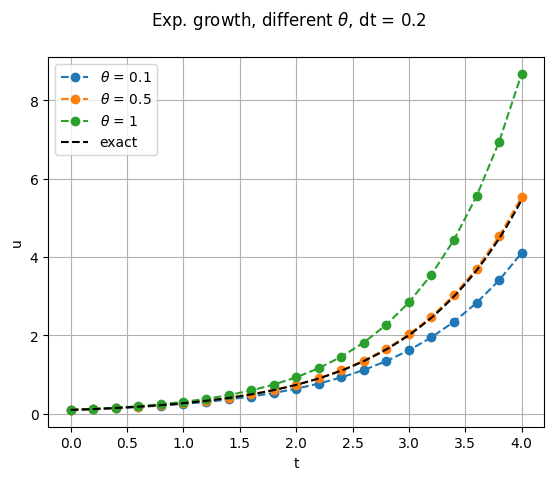

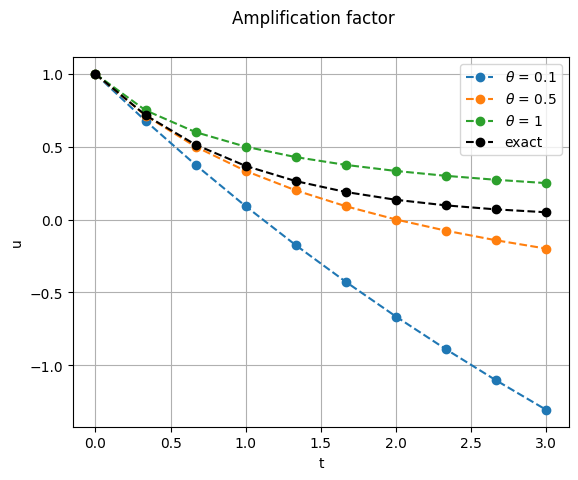

In [20]:
if __name__ == '__main__':
    compare_num_exact(theta=[0.1, 0.5, 1.0], I=0.1, a=-1, T=4.0, dt=0.2)
    amp_compare(theta=[0.1, 0.5, 1.0], adt=np.linspace(0,3,10))

    plt.show()